## Black Scholes Merton Model

여기서는 BSM Model의 이산 시간 버전으로 시작한다. 잘 알려진 바와 같이 이 공식에서 option hedging과 가격 결정의 문제는 순차적 위험 최소화에 해당한다. 해결해야 할 주요 문제는 옵션에서 위험을 어떻게 정의하느냐이다. 이 부분에서 Föllmer와 Schweizer(1989), Schweizer(1995), Cerný와 Kallsen(2007)의 연구에서 개척된 국지적 위험 최소화 접근법을 따른다. 비슷한 방법이 물리학자 Potters et al.(2001)에 의해 개발됐다. Petrelli et al.(2010)의 작업도 참고하자. 우리는 Grau(2007)에서 제안된 버전의 접근법을 사용한다.

이 접근법에서 만기 시점의 최종 주가 $S_T$에 의존하는 만기 시의 최종 수익 $H_T(S_T)$인 European Option의 매도자 입장을 취한다. 옵션을 헤징하고자 매도자는 매도 수익금을 주식 $S_t$와 무위험 은행 예금 $B_t$로 구성된 복제 포트폴리오 $\Pi_t$를 설정한다. hedge portfolio의 가치는 어떤 시점 $t \geq T$에서도 다음과 같이 된다.

$$\Pi_t = u_t S_t + B_t$$

여기서 $u_t$는 옵션 위험을 헤징하고자 취해진 시점 $t$의 주식 포지션이다.

In [1]:
import numpy as np
import pandas as pd

### 1. Hedge Portfolio Evaluation

보통 그렇즛이 복제 포트폴리오는 미래의 모든 가능한 세계의 상태에서 옵션 가격을 정확하게 일치시키려고 한다. 옵션 포지션이 청산되는 만기 $T$에 시작한다면 헷지 포지션 $u_t$도 동시에 청산돼야 하므로 $u_t = 0$으로 설정한다.

$$\Pi_T = B_T = H_T(S_T)$$

이는 시점 $T$에서 세계의 모든 상태에서 $B_T$에 대해 성립돼야 하는 최종 조건을 설정한다. 이전 시점 $t < T$에서 은행 계좌에 보유해야 할 금액을 찾고자 헷지 포트폴리오의 모든 미래 변화는 옵션의 생애에 걸쳐 현금 유입이나 인출 없이 최초 설정된 은행 계좌에서 자금을 조달해야 한다고 요구하는 자기 자금조달 제약 조건을 부과한다. 이는 시간 $t + 1$에서 다시 헷지 함으로써 포트폴리오 가치를 보존하는 다음의 관계를 의미한다.

$$u_t S_{t+1} + e^{r\Delta t} B_t = u_{t+1} S_{t+1} + B_{t+1}$$

이 관계식은 예금 계좌의 다음 타임스텝의 가치를 사용해 어떠한 시점 $t<T$의 옵션을 헤징하기 위한 은행 계좌의 현금 수량을 계산하고자 재귀적으로 표현될 수 있다.

$$B_t = e^{-r \Delta t} \left[ B_{t+1} + (u_{t+1} - u_t) S_{t+1}\right], \qquad t = T-1, \dots, 0$$

이를 식 $\Pi_t = u_t S_t + B_t$에 대입하면 $\Pi_t$에 대한 이휴 시간의 가치로 표현된 재귀적 관계식을 생성하며, 따라서 이 재귀식은 최종 조건으로 $t = T$에서 시작해 현재 시검 $t = 0$에까지 계속하는 식으로 시간의 역방향으로 풀 수 있다.

$$\Pi_t = e^{-r \Delta t} \left[ \Pi_{t+1} - u_t \Delta S_t\right], \qquad \Delta S_t = S_{t+1} - e^{r \Delta t}S_t, \qquad t = T-1, \dots, 0$$

위 두 식은 $B_t$와 $\Pi_t$가 미래에 의존하므로 어떤 $t < T$에서도 측정할 수 없다는 것을 의미한다는 점에 유의하라. 각각 현재 $B_0$와 $\Pi_0$의 값은 어떤 분포를 가진 랜덤 양이 된다. 어떠한 주어진 헷징 전략 $\{u_t\}^T_{t=0}$에 대해서도, 이러한 분포는 우선 기초 자산 가격의 $S_1 \rightarrow S_2 \rightarrow \dots \rightarrow S_N$에서 $N$개의 경로를 시뮬레이션한 다음 각 경로에서 약방향으로 진행하면서 평가하는 몬테카를로 시뮬레이션을 사용해 추정할 수 있다. 헤징 전략의 선택은 기초 자산의 진화에 영향을 미치지 않기 때문에 전방 경로의 시뮬레이션은 한 번만 수행한 다음, 상이한 헤지 전략 시나리오에서의 헤지 포트폴리오의 미래 평가에 재사용한다는 점에 유의하자. 또는, 미리 결정된 헤징 전략 $\{u_t\}_{t=0}^T$ 및 최종 조건과 함께 주가에 대한 실제 과거 데이터를 사용해 헤지 포트폴리오 가치 $\Pi_0$의 분포를 추정할 수 있다.

요약하자면 몬테카를로 시뮬레이션의 전방향 패스는 프로세스 $S_1 \rightarrow S_2 \rightarrow \dots \rightarrow S_N$을 시뮬레이션해 수행되며, 역방향 패스는 설정된 헤지 전략인 $\{u_t\}_{t=0}^T$을 사용하고, 리스크에 대한 타임머신 역할을 하는 자기 자금 조달 제약식을 통해 미래의 불확실성을 현재 불확실성으로 역전파하는 재귀식을 사용해 수행된다.

미래에서 현재 시간 $t$로의 그러한 불확실성의 역전파의 결과로 시점 $t$의 포트폴리오 $\Pi_t$를 복제하는 옵션은 특정 분포를 갖는 랜덤 수량이다. 옵션 매도자가 받아들일 수 있는 옵션 가격은 옵션 매도자의 위험 선호도에 따라 결정될 것이다. 예를 들어 옵션 가격은 $\Pi_t$의 분포에서 평균 더하기 위험에 대한 일부 프리미엄으로 취해질 수 있다. 분명히 옵션 가격은 매도자가 미래에 사용할 헤지 전략 $\{u_t\}_{t=0}^T$을 결정한 후에만 결정될 수 있으며, 이 헤지 전략은 어떠한 미래 가치 $\{\Pi_t\}_{t=0}^T$에 대해서도 동일한 방식으로 적용된다. 따라서 최적 헤지 전략 $\{u_t\}_{t=0}^T$의 선택은 다음에 논의할 것이다.

In [2]:
# Parameters for Monte Carlo simulation
T = 1  # Total time in years
N = 252  # Number of time steps (daily for one year)
dt = T / N  # Time step size
r = 0.01  # Annual risk-free rate
sigma = 0.2  # Volatility of the underlying asset
S0 = 100  # Initial stock price
num_paths = 10000  # Number of Monte Carlo paths

In [3]:
# Simulate asset paths using Geometric Brownian Motion (GBM)
np.random.seed(42)
dW = np.random.normal(0, np.sqrt(dt), (num_paths, N))
S = np.zeros((num_paths, N + 1))
S[:, 0] = S0

for t in range(1, N + 1):
    S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * dW[:, t - 1])

In [4]:
# Hedging strategy: simple delta hedging (placeholder, this needs a strategy)
u = np.zeros((num_paths, N + 1))
u[:, -1] = 0  # Final hedge position at T is 0

In [5]:
# Recursive backward evaluation of the hedging portfolio
B = np.zeros((num_paths, N + 1))
B[:, -1] = S[:, -1]  # Final condition B_T = S_T

for t in range(N - 1, -1, -1):
    B[:, t] = np.exp(-r * dt) * (B[:, t + 1] + (u[:, t + 1] - u[:, t]) * S[:, t + 1])

In [6]:
# Calculate Pi_t
Pi = np.zeros((num_paths, N + 1))
Pi[:, -1] = S[:, -1]  # Final portfolio value at T

for t in range(N - 1, -1, -1):
    delta_S = S[:, t + 1] - np.exp(r * dt) * S[:, t]
    Pi[:, t] = np.exp(-r * dt) * (Pi[:, t + 1] - u[:, t] * delta_S)

In [7]:
# Calculate the initial portfolio distribution
Pi_0_distribution = Pi[:, 0]

In [8]:
# Print the results
mean_Pi_0 = np.mean(Pi_0_distribution)
std_Pi_0 = np.std(Pi_0_distribution)

print(f"Mean initial portfolio value (Pi_0): {mean_Pi_0:.2f}")
print(f"Standard deviation of initial portfolio value (Pi_0): {std_Pi_0:.2f}")

Mean initial portfolio value (Pi_0): 99.81
Standard deviation of initial portfolio value (Pi_0): 19.94


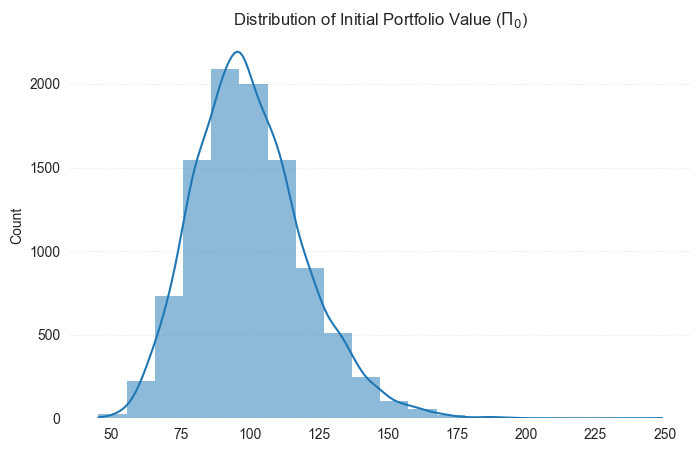

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize = (8, 5))
sns.histplot(
    Pi_0_distribution, bins = 20, 
    edgecolor = 'none', 
    kde = True,
    ax = ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title(r'Distribution of Initial Portfolio Value ($\Pi_0$)')
plt.show()

### 2. Optimal Hedging Strategy

경로별로 수행되는 헤지 포트폴리오 가치의 재귀 계산과는 달리 최적 헤지는 모든 경로에 걸쳐 동시에 작동하는 횡단면 분석을 사용해 계산된다. 이는 우리가 미래에 직면할 수 있는 모든 상태에 적용될 헤지 전략인 $\{u_t\}_{t=0}^T$을 학습할 필요가 있기 때문이다. 그러나 각각의 주어진 경로는 시점 $t$에 하나의 값 $S_t$만 생성한다. 따라서 주어진 time step $t$에 대해 최적 헤지 $u_t(S_t)$를 계산하고자 모든 동시 발생적 경로에 대한 횡단면 정보가 필요하다. 포트폴리오 가치 계산과 마찬가지로 최적 헤지 $\{u_t\}_{t=0}^T$은 $t = T$부터 시작해 시간 역방향으로 계산된다. 그러나 우리는 매 시점 $t$에서 어떤 헤지를 계산할 때 미래를 알 수 없기 때문에 최적 헤지 $u_t$에 대한 어떠한 계산도 시점 $t$에서 이용할 수 있는 정보 $\mathcal{F}_t$에 대해서만 조건화할 수 있다. 이 계산은 Longstaff와 Schwartz(2001)의 미국형 몬테카를로 옵션 가격 결정 방법과 유사하다. 

이 모델에서 최적 헤지 $u^*(S_t)$는 현재 이용할 수 있는 횡단면 정보 $\mathcal{F}_t$를 조건부로 할 때 시점 $t$의 모든 시뮬레이션 경로에 걸친 $\Pi_t$의 분산을 최소화하는 조건으로부터 얻어진다. 즉, 다음과 같다.

$$
\begin{align}
u^*_t (S_t) = & \arg \min_u \text{Var}\left[ \Pi_t | \mathcal{F}_t\right] \\
= & \arg \min_u \text{Var}\left[ \Pi_{t+1} - u_t \Delta S_t | \mathcal{F}_t\right], \qquad t = T-1, \dots, 0
\end{align}
$$

위 식의 첫 번째 표현은 $\Pi_t$의 모든 불확실성은 옵션 만기 $T$의 미래 의무를 충족하고자 시점 $t$에서 은행 계좌에 보유해야 하는 현금의 양 $B_t$에 관련된 불확실성에 기인한다는 것을 의미한다. 이는 최적 헤지가 각 time step $t$마아 옵션 포지션에 대한 헤지 자본 비용을 최소화해야 한다는 것을 의미한다.

최적 헤지는 위 식의 미분을 0으로 설정함으로써 분석적으로 찾을 수 있다. 이것은 다음을 제공한다.

$$u^*_t \left( S_t\right) = \frac{\text{Cov}\left(\Pi_{t+1}, \Delta  S_t\right) | \mathcal{F}_t}{\text{Var}\left(\Delta S_t | \mathcal{F}_t\right)}, \qquad t = T-1, \dots, 0$$

In [25]:
# Recursive calculation of Pi and optimal hedge
u_star = np.zeros((num_paths, N))  # Store optimal hedge ratios

In [26]:
for t in range(N - 1, -1, -1):
    delta_S = S[:, t + 1] - np.exp(r * dt) * S[:, t]
    
    # Calculate optimal hedge ratio u_t^*
    cov_matrix = np.cov(Pi[:, t + 1], delta_S, ddof=0)
    cov_Pi_deltaS = cov_matrix[0, 1]
    var_deltaS = cov_matrix[1, 1]
    
    if var_deltaS != 0:  # Avoid division by zero
        u_star[:, t] = cov_Pi_deltaS / var_deltaS
    
    # Update portfolio value Pi_t using optimal hedge
    Pi[:, t] = np.exp(-r * dt) * (Pi[:, t + 1] - u_star[:, t] * delta_S)

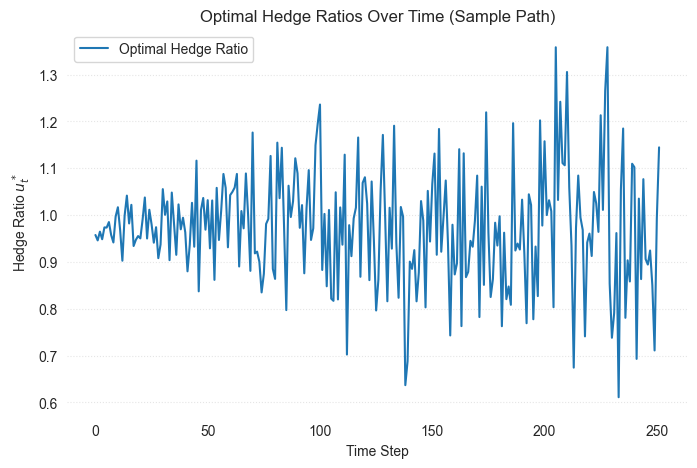

In [30]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(range(N), u_star[0, :], label='Optimal Hedge Ratio')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Optimal Hedge Ratios Over Time (Sample Path)')
plt.xlabel('Time Step')
plt.ylabel(r'Hedge Ratio $u_t^*$')
plt.legend()
plt.show()

이 표현은 시점 $t$에 조건부로 시점 $t+1$의 양에 대한 1 step 기대값을 포함한다. 이들이 어떻게 계산될 수 있는가는 우리가 연속적 상태 공간을 다루는지 이산적 상태 공간을 다루는지의 여부에 달려 있다. 상태 공간이 이산적인 경우 그러한 1 step 조건부 기대는 단순히 MDP 모델의 전이 확률에 관련된 유한 합이다. 반면 연속 상태 설정에서 작업하는 경우 이러한 조건부 기대는 롱스테프와 슈워츠의 LSMC방법 또는 Grau, Petrelli et al.(2010), Potters et al.(2001)의 real measure MC Method와 유사한 기저 함수 전개를 사용하여 몬테카를로 설정에서 계산할 수 있다.

다음 설명에서 위 식과 같이 일반적인 표기법을 사용해 $\mathcal{F_t}$가 시점 $t$에 설정된 횡단면 정보를 나타내는 유사한 조건부 기대를 나타내며, 이를 통해 연속 상태 공간과 이산 상태 공간의 두 가지 경우를 모두 처리할 수 있을 만큼 일반적인 공식을 찾아보고 필요시 이산 상태 공식의 특별한 경우에서 발생하는 단순화를 다룬다.

### 3. Option Pricing in Discrete Time

hedge portfolio $\Pi_t$의 시점 $t$에서 기대값으로 정의되는 공정 옵션 가격(fair option price)$\hat{C}_t$의 개념으로 시작한다.

$$\hat{C}_t = \mathbb{E}_t \left[\Pi_t | \mathcal{F}_t\right]$$

식 $\Pi_t = e^{-r \Delta t} \left[ \Pi_{t+1} - u_t \Delta S_t\right], \qquad \Delta S_t = S_{t+1} - e^{r \Delta t}S_t, \qquad t = T-1, \dots, 0$와 tower law of conditional expectation $\mathbb{E}[X] = \mathbb{E}[\mathbb{E}[X|Y]]$를 사용하면 다음을 얻는다.

$$
\begin{align}
\hat{C}_t = & \mathbb{E}_t \left[ e^{-r \Delta t} \Pi_{t+1} \vert \mathcal{F}_t\right] - u_t(S_t)\mathbb{E}_t \left[ \Delta S_t \vert \mathcal{F}_t\right] \\
= & \mathbb{E}_t \left[ e^{-r \Delta t} \mathbb{E}_t \left[ \Pi_{t+1} \vert \mathcal{F}_{t+1}\right] \vert \mathcal{F}_t\right] - u_t(S_t)\mathbb{E}_t \left[ \Delta S_t \vert \mathcal{F}_t\right] \\
= & \mathbb{E}_t \left[ e^{-r \Delta t} \hat{C}_{t+1} \vert \mathcal{F}_t\right] - u_t(S_t)\mathbb{E}_t \left[ \Delta S_t \vert \mathcal{F}_t\right], \qquad t = T-1, \dots, 0
\end{align}
$$

최적 헤지를 $\Pi_{t+1}$ 대신 $\hat{C}_{t+1}$로 표현하고자 유사하게 tower law of conditional expectation을 사용할 수 있다.

$$u_t^*(S_t) = \frac{\text{Cov}\left(\Pi_{t+1},  \Delta S_t \vert \mathcal{F}_t\right)}{\text{Var}\left(\Delta S_t \vert \mathcal{F}_t\right)} = \frac{\text{Cov}\left(\hat{C}_{t+1},  \Delta S_t \vert \mathcal{F}_t\right)}{\text{Var}\left(\Delta S_t \vert \mathcal{F}_t\right)}$$

이제 위 두 개의 식을 정리하면 $\hat{C}_t$에 대한 재귀 관계를 다음 형태로 표현할 수 있다.

$$\hat{C}_t = e^{-r \Delta t} \mathbb{E}^{\hat{\mathbb{Q}}} \left[ \hat{C}_{t+1} \vert \mathcal{F}_t\right], \qquad t = T-1, \dots, 0$$

In [44]:
# Initialize option price (payoff at maturity)
K = 125  # Strike price for the option
C = np.maximum(S[:, -1] - K, 0)  # European call option payoff at T

In [45]:
# Recursive calculation of fair option price using the backward induction method
for t in range(N - 1, -1, -1):
    # Calculate expectation at time t using the Monte Carlo average
    C = np.exp(-r * dt) * C  # Discount the expected future option price

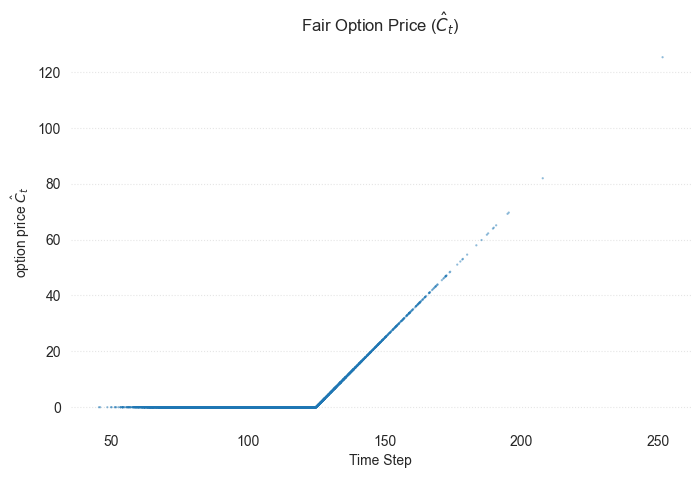

In [46]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(
    S[:, -1], C, 
    marker = '.', 
    edgecolor = 'None',
    alpha = 0.5,
    s = 10
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title(r'Fair Option Price ($\hat{C}_t$)')
plt.xlabel('Time Step')
plt.ylabel(r'option price $\hat{C}_t$')
plt.show()